Epoch 1, Accuracy: 0.91
Epoch 2, Accuracy: 0.95
Epoch 3, Accuracy: 0.97
Epoch 4, Accuracy: 0.97
Epoch 5, Accuracy: 0.98
Epoch 6, Accuracy: 0.98
Epoch 7, Accuracy: 0.99
Epoch 8, Accuracy: 0.99
Epoch 9, Accuracy: 0.99
Epoch 10, Accuracy: 0.99


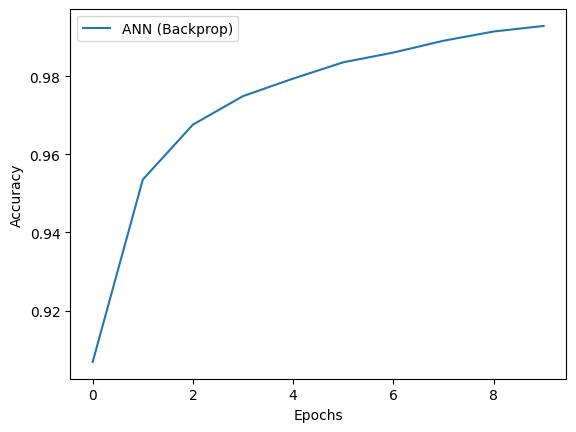

In [2]:
import torch
import torch.nn as nn
import torch.optim as optim
from torchvision import datasets, transforms
import matplotlib.pyplot as plt

# Load MNIST
transform = transforms.ToTensor()
train_data = datasets.MNIST(root='./data', train=True, download=True, transform=transform)
train_loader = torch.utils.data.DataLoader(train_data, batch_size=64, shuffle=True)

# Simple ANN
model = nn.Sequential(
    nn.Flatten(),
    nn.Linear(784, 128),
    nn.ReLU(),
    nn.Linear(128, 10)
)
optimizer = optim.Adam(model.parameters(), lr=0.001)
criterion = nn.CrossEntropyLoss()

# Training loop
epochs = 10
accuracies = []
for epoch in range(epochs):
    correct = 0
    for images, labels in train_loader:
        optimizer.zero_grad()
        output = model(images)
        loss = criterion(output, labels)
        loss.backward()
        optimizer.step()
        correct += (output.argmax(1) == labels).sum().item()
    accuracy = correct / len(train_data)
    accuracies.append(accuracy)
    print(f"Epoch {epoch+1}, Accuracy: {accuracy:.2f}")

# Plot
plt.plot(range(epochs), accuracies, label="ANN (Backprop)")
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.legend()
plt.show()

Epoch 1: Train Acc: 47.0% | Test Acc: 67.2%
Saved new best model with test accuracy: 67.2%
Epoch 2: Train Acc: 68.2% | Test Acc: 72.6%
Saved new best model with test accuracy: 72.6%
Epoch 3: Train Acc: 72.1% | Test Acc: 74.9%
Saved new best model with test accuracy: 74.9%
Epoch 4: Train Acc: 74.2% | Test Acc: 76.6%
Saved new best model with test accuracy: 76.6%
Epoch 5: Train Acc: 75.6% | Test Acc: 77.9%


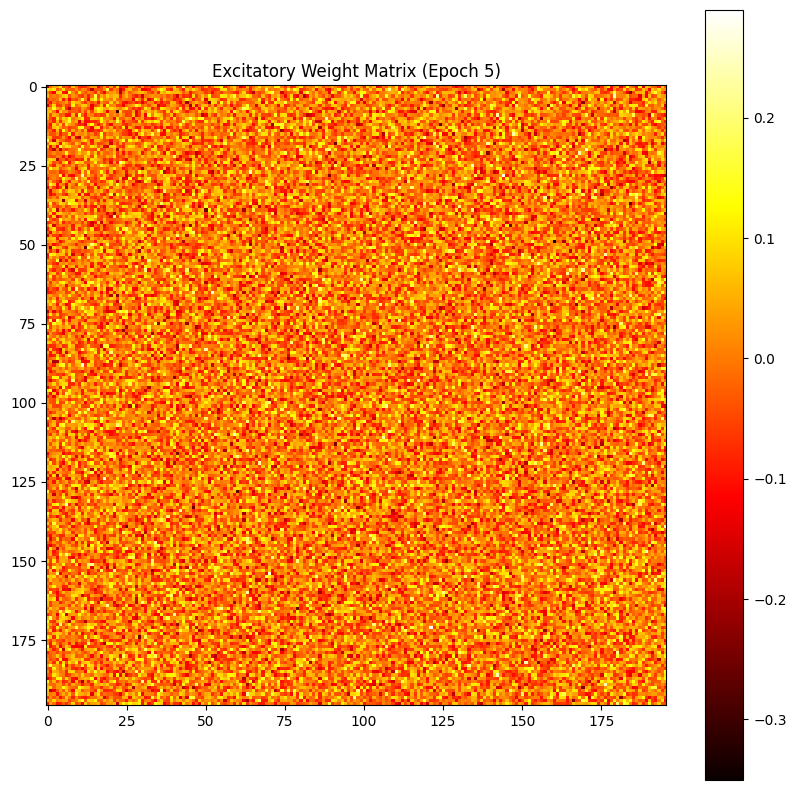

Saved new best model with test accuracy: 77.9%
Epoch 6: Train Acc: 76.8% | Test Acc: 79.1%
Saved new best model with test accuracy: 79.1%
Epoch 7: Train Acc: 77.8% | Test Acc: 79.8%
Saved new best model with test accuracy: 79.8%
Epoch 8: Train Acc: 78.5% | Test Acc: 80.3%
Saved new best model with test accuracy: 80.3%
Epoch 9: Train Acc: 79.2% | Test Acc: 80.9%
Saved new best model with test accuracy: 80.9%
Epoch 10: Train Acc: 79.8% | Test Acc: 81.3%


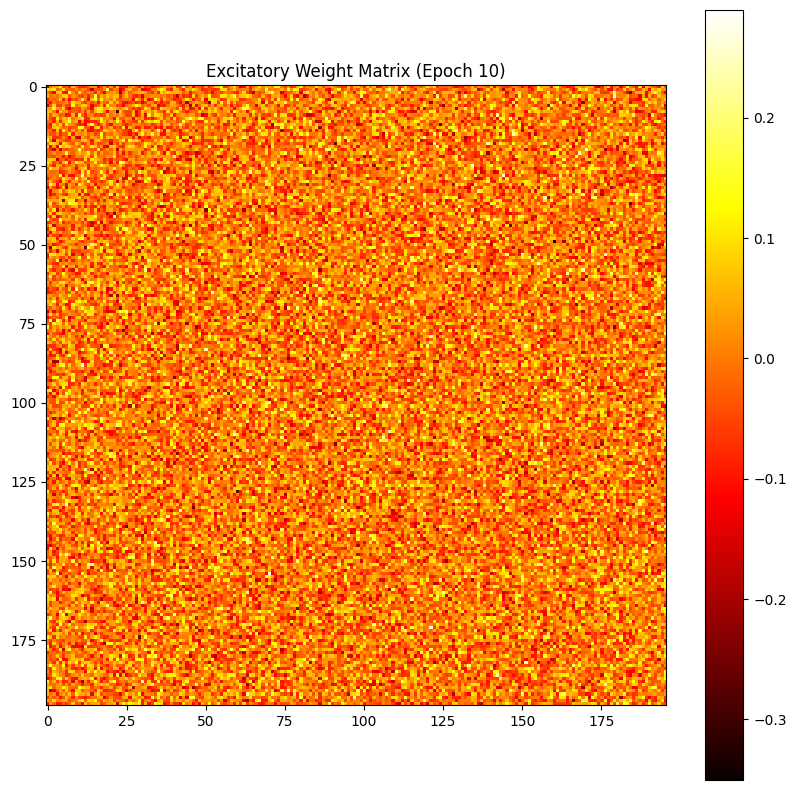

Saved new best model with test accuracy: 81.3%
Epoch 11: Train Acc: 80.3% | Test Acc: 81.7%
Saved new best model with test accuracy: 81.7%
Epoch 12: Train Acc: 80.8% | Test Acc: 82.2%
Saved new best model with test accuracy: 82.2%
Epoch 13: Train Acc: 81.1% | Test Acc: 82.5%
Saved new best model with test accuracy: 82.5%
Epoch 14: Train Acc: 81.5% | Test Acc: 82.8%
Saved new best model with test accuracy: 82.8%
Epoch 15: Train Acc: 81.9% | Test Acc: 83.2%


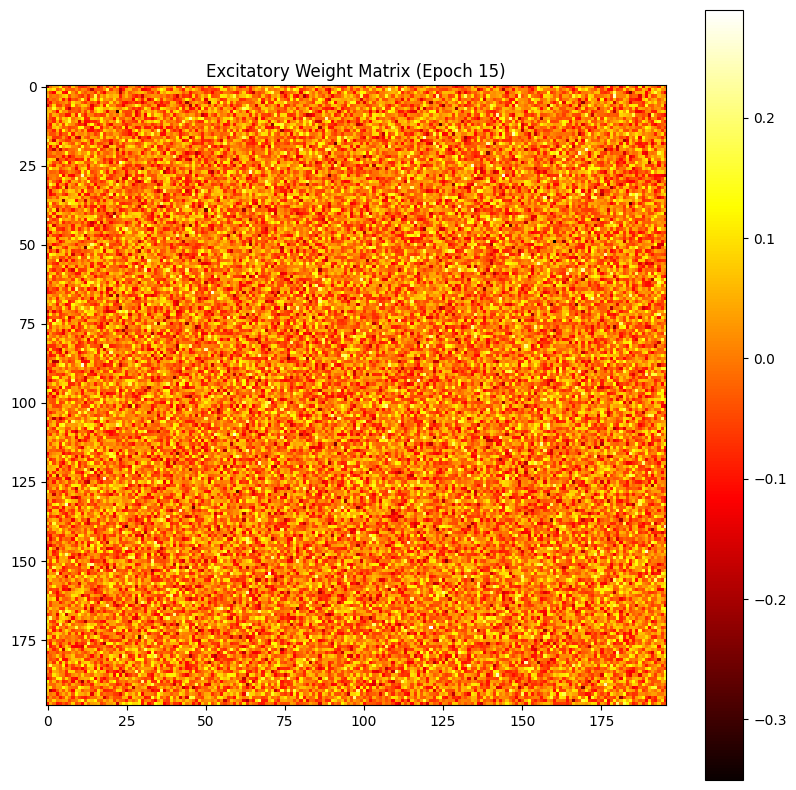

Saved new best model with test accuracy: 83.2%
Epoch 16: Train Acc: 82.2% | Test Acc: 83.6%
Saved new best model with test accuracy: 83.6%
Epoch 17: Train Acc: 82.5% | Test Acc: 83.8%
Saved new best model with test accuracy: 83.8%
Epoch 18: Train Acc: 82.8% | Test Acc: 84.1%
Saved new best model with test accuracy: 84.1%
Epoch 19: Train Acc: 83.1% | Test Acc: 84.3%
Saved new best model with test accuracy: 84.3%
Epoch 20: Train Acc: 83.3% | Test Acc: 84.5%


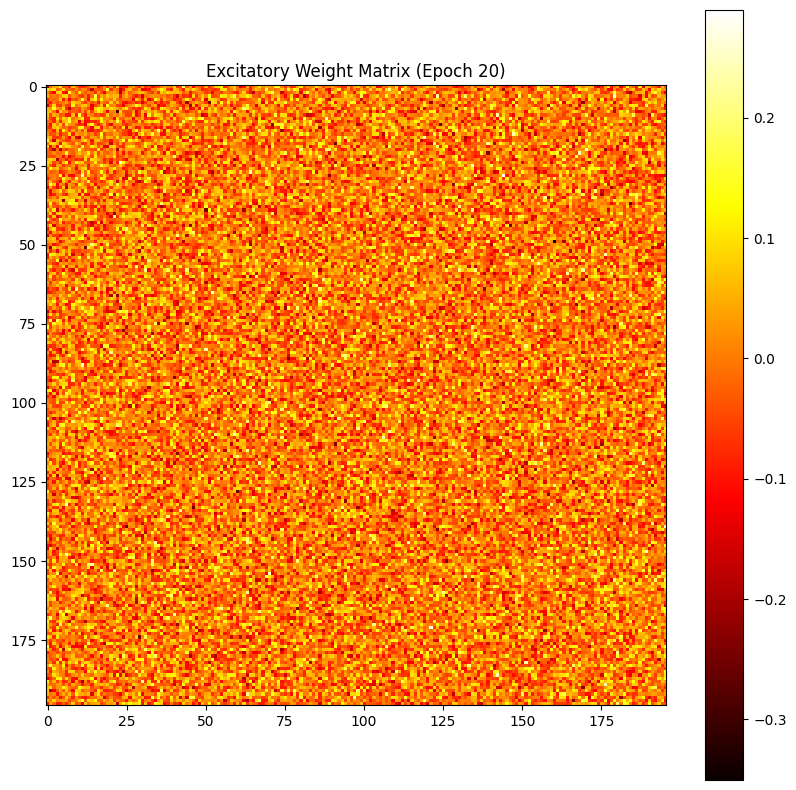

Saved new best model with test accuracy: 84.5%
Epoch 21: Train Acc: 83.6% | Test Acc: 84.7%
Saved new best model with test accuracy: 84.7%
Epoch 22: Train Acc: 83.8% | Test Acc: 84.9%
Saved new best model with test accuracy: 84.9%
Epoch 23: Train Acc: 84.0% | Test Acc: 85.1%
Saved new best model with test accuracy: 85.1%
Epoch 24: Train Acc: 84.2% | Test Acc: 85.2%
Saved new best model with test accuracy: 85.2%
Epoch 25: Train Acc: 84.3% | Test Acc: 85.3%


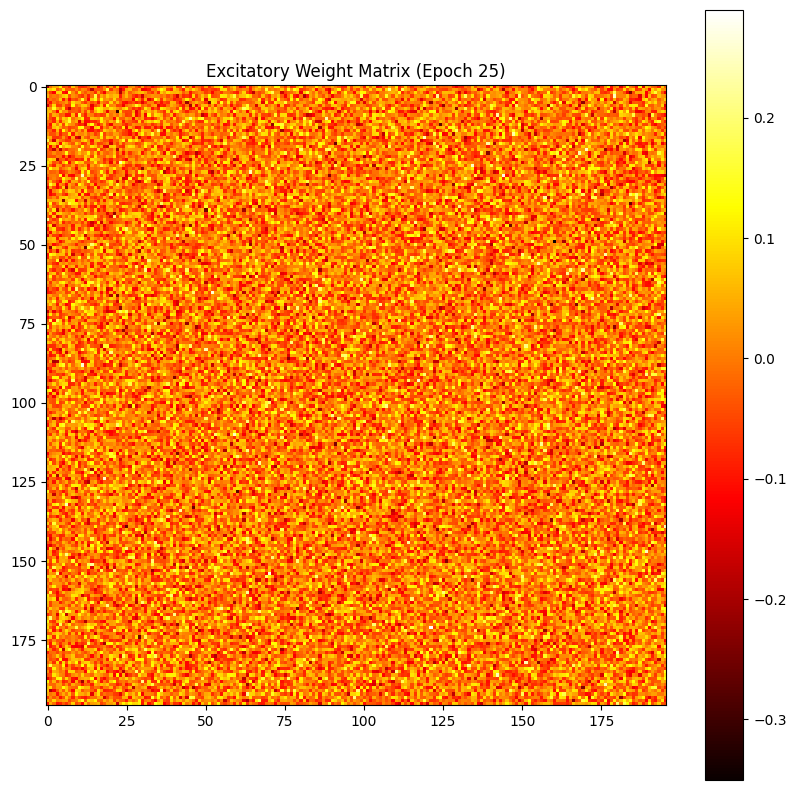

Saved new best model with test accuracy: 85.3%
Epoch 26: Train Acc: 84.5% | Test Acc: 85.6%
Saved new best model with test accuracy: 85.6%
Epoch 27: Train Acc: 84.6% | Test Acc: 85.7%
Saved new best model with test accuracy: 85.7%
Epoch 28: Train Acc: 84.8% | Test Acc: 85.8%
Saved new best model with test accuracy: 85.8%
Epoch 29: Train Acc: 85.0% | Test Acc: 85.9%
Saved new best model with test accuracy: 85.9%
Epoch 30: Train Acc: 85.1% | Test Acc: 86.0%


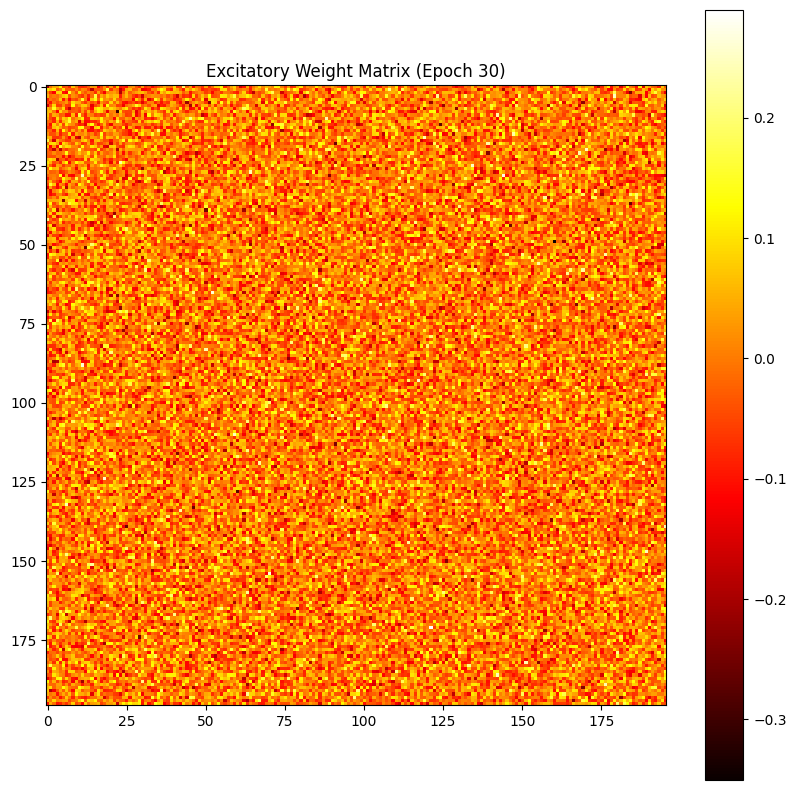

Saved new best model with test accuracy: 86.0%

Final Test Accuracy: 86.0%


In [1]:
import torch
import torch.nn as nn
import torch.optim as optim
from torchvision import datasets, transforms
import matplotlib.pyplot as plt
import os

class OjaLayer(nn.Module):
    """Layer implementing Oja's rule without breaking autograd"""
    def __init__(self, input_size, output_size):
        super().__init__()
        self.weight = nn.Parameter(torch.randn(output_size, input_size) * 0.01)
        self.eta = 0.001  # Learning rate
        self.lambda_ = 0.01  # Weight decay
        
        # Register buffers for traces
        self.register_buffer('trace_pre', torch.zeros(input_size))
        self.register_buffer('trace_post', torch.zeros(output_size))
        
    def forward(self, x):
        """Standard forward pass (preserves gradients)"""
        return torch.mm(x, self.weight.t())
    
    def update_weights(self, x):
        """Separate method for weight updates (detached from autograd)"""
        with torch.no_grad():
            # Update traces (exponential moving average)
            self.trace_pre = 0.9 * self.trace_pre + 0.1 * x.mean(dim=0)
            output = torch.mm(self.trace_pre.unsqueeze(0), self.weight.t()).squeeze(0)
            self.trace_post = 0.9 * self.trace_post + 0.1 * output
            
            # Oja's rule update
            dw = self.eta * (
                torch.outer(self.trace_post, self.trace_pre) - 
                (self.trace_post.pow(2).unsqueeze(1) * self.weight)
            )
            
            # Apply weight decay and update
            self.weight.data += dw - self.lambda_ * self.weight.data
            
            # Normalize weights
            norms = torch.norm(self.weight.data, dim=1, keepdim=True)
            self.weight.data /= (norms + 1e-8)

class StableSNN(nn.Module):
    def __init__(self):
        super().__init__()
        # Input processing
        self.downsample = nn.AvgPool2d(2)  # 28x28 -> 14x14
        self.input_size = 14 * 14
        
        # Spiking layers
        self.excitatory = OjaLayer(self.input_size, self.input_size)
        self.inhibitory = OjaLayer(self.input_size, self.input_size)
        
        # Readout layer
        self.classifier = nn.Linear(self.input_size, 10)
        
    def forward(self, x):
        # Process input
        x = self.downsample(x)
        x = x.view(-1, self.input_size) / 255.0
        
        # Excitatory path
        exc_out = self.excitatory(x)
        
        # Inhibitory path
        inh_out = self.inhibitory(exc_out.detach())  # Detach for separate learning
        
        # Apply learning rules if training
        if self.training:
            self.excitatory.update_weights(x)
            self.inhibitory.update_weights(exc_out.detach())
        
        # Balanced output
        out = exc_out - 0.5 * inh_out
        
        # Classification
        return self.classifier(out)

def show_weights(layer, epoch):
    """Visualization function"""
    weights = layer.weight.data.cpu()
    plt.figure(figsize=(10,10))
    plt.imshow(weights, cmap='hot')
    plt.colorbar()
    plt.title(f"Excitatory Weight Matrix (Epoch {epoch+1})")
    plt.show()

def train_stable_model(save_path='snn_model.pth'):
    # Data setup
    transform = transforms.Compose([
        transforms.ToTensor(),
        transforms.Normalize((0.1307,), (0.3081,))
    ])
    
    train_data = datasets.MNIST('./data', train=True, download=True, transform=transform)
    test_data = datasets.MNIST('./data', train=False, transform=transform)
    train_loader = torch.utils.data.DataLoader(train_data, batch_size=64, shuffle=True)
    test_loader = torch.utils.data.DataLoader(test_data, batch_size=1000, shuffle=False)
    
    # Model setup
    device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
    model = StableSNN().to(device)
    
    # Optimizer only for classifier
    optimizer = optim.Adam(model.classifier.parameters(), lr=0.001)
    criterion = nn.CrossEntropyLoss()
    
    # Training
    best_acc = 0
    for epoch in range(30):
        model.train()
        correct = 0
        total = 0
        
        for data, target in train_loader:
            data, target = data.to(device), target.to(device)
            
            # Gradient checking
            optimizer.zero_grad()
            output = model(data)
            loss = criterion(output, target)
            loss.backward()
            
            optimizer.step()
            
            _, predicted = output.max(1)
            total += target.size(0)
            correct += predicted.eq(target).sum().item()
        
        # Validation
        model.eval()
        test_correct = 0
        test_total = 0
        with torch.no_grad():
            for data, target in test_loader:
                data, target = data.to(device), target.to(device)
                output = model(data)
                _, predicted = output.max(1)
                test_total += target.size(0)
                test_correct += predicted.eq(target).sum().item()
        
        test_acc = 100. * test_correct / test_total
        print(f'Epoch {epoch+1}: '
              f'Train Acc: {100.*correct/total:.1f}% | '
              f'Test Acc: {test_acc:.1f}%')
        
        # Visualize weights every 5 epochs
        if (epoch+1) % 5 == 0:
            show_weights(model.excitatory, epoch)
        
        # Save best model
        if test_acc > best_acc:
            best_acc = test_acc
            torch.save(model.state_dict(), save_path)
            print(f"Saved new best model with test accuracy: {best_acc:.1f}%")
    
    return model

def test_saved_model(load_path='snn_model.pth'):
    """Test a saved model"""
    # Load data
    transform = transforms.Compose([
        transforms.ToTensor(),
        transforms.Normalize((0.1307,), (0.3081,))
    ])
    test_data = datasets.MNIST('./data', train=False, transform=transform)
    test_loader = torch.utils.data.DataLoader(test_data, batch_size=1000, shuffle=False)
    
    # Load model
    device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
    model = StableSNN().to(device)
    model.load_state_dict(torch.load(load_path))
    model.eval()
    
    # Test
    correct = 0
    total = 0
    with torch.no_grad():
        for data, target in test_loader:
            data, target = data.to(device), target.to(device)
            output = model(data)
            _, predicted = output.max(1)
            total += target.size(0)
            correct += predicted.eq(target).sum().item()
    
    print(f"\nFinal Test Accuracy: {100.*correct/total:.1f}%")
    return 100.*correct/total

# Run training and testing
if __name__ == "__main__":
    # Train and save model
    trained_model = train_stable_model()
    
    # Test the saved model
    final_accuracy = test_saved_model()
    
    # You can now reuse the saved model anytime by calling:
    # test_saved_model('snn_model.pth')

In [3]:
import torch
import torch.nn as nn
from torchvision import datasets, transforms
from torch.utils.data import DataLoader

# Load the trained model
model = StableSNN()  # Make sure this matches your model class
model.load_state_dict(torch.load('snn_model.pth'))
model.eval()  # Set to evaluation mode

# MNIST Test Data
transform = transforms.Compose([
    transforms.ToTensor(),
    transforms.Normalize((0.1307,), (0.3081,))
])
test_data = datasets.MNIST('./data', train=False, download=True, transform=transform)
test_loader = DataLoader(test_data, batch_size=1000, shuffle=True)

# Test Function
def test_accuracy(model, test_loader):
    correct = 0
    total = 0
    
    with torch.no_grad():
        for images, labels in test_loader:
            outputs = model(images)
            _, predicted = torch.max(outputs.data, 1)
            total += labels.size(0)
            correct += (predicted == labels).sum().item()
    
    accuracy = 100 * correct / total
    print(f'Test Accuracy: {accuracy:.2f}%')
    return accuracy

# Run test
test_accuracy(model, test_loader)

Test Accuracy: 85.99%


85.99